# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)



**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df= pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
print("number of rows: {}".format(df.shape[0]))

number of rows: 294478


**c.** The number of unique users in the dataset.

In [5]:
print("number of unique users: {}".format(df['user_id'].nunique()))

number of unique users: 290584


**d.** The proportion of users converted.

In [6]:
df['converted'].mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
len(df[((df['group']=='treatment') != (df['landing_page']=='new_page'))])

3893

**f.** Do any of the rows have missing values?

In [8]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

&#9865; **There are no missing values in any of the five columns**



**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2= df[((df['group']=='treatment') == (df['landing_page']=='new_page'))].copy()

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

**a.** How many unique **user_id**s are in **df2**?

In [11]:
print("number of unique users: {}".format(df2['user_id'].nunique()))

number of unique users: 290584


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2['user_id'].duplicated().any()

True

In [13]:
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [14]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [15]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop_duplicates('user_id', inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
df2['user_id'].duplicated().any()

False

&#9865; **There is no longer any duplicate row**




**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>



In [16]:
p= df2['converted'].mean()

print('The probability is: {}'.format(p))

The probability is: 0.11959708724499628


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control_df= df2.query('group == "control"')

control_con= control_df.query('converted == 1').shape[0] / control_df.shape[0]

print('The probability of converting the control is: {}'.format(control_con))

The probability of converting the control is: 0.1203863045004612


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
treatment_df= df2.query('group == "treatment"')

treatment_con= treatment_df.query('converted == 1').shape[0] / treatment_df.shape[0]

print('The probability of converting the treatment is: {}'.format(treatment_con))

The probability of converting the treatment is: 0.11880806551510564


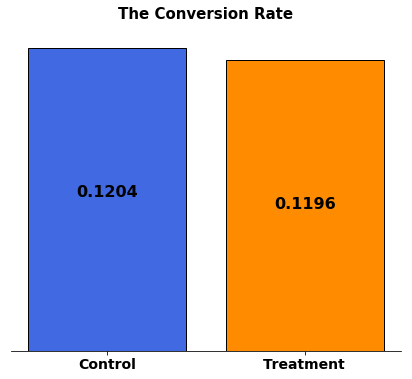

In [19]:
X = ['Control', 'Treatment']
Y = [0.1204, 0.1196] # Conversion rates for both control and treatment after approximation


plt.figure(figsize=(7,6))
plt.bar(X, Y, edgecolor=["black", "black"] , color=['royalblue', 'darkorange'])

for i, g in enumerate(Y):
    plt.text(i, g - 0.01, "{}".format(g), fontsize=16, fontweight="bold", ha="center")

plt.title("The Conversion Rate", fontsize=15, fontweight="bold" )
plt.ylim(0.10,0.122)
plt.xticks(fontsize=14, fontweight="bold")
plt.yticks([])
sns.despine(left=True);

In [20]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_con - control_con
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [21]:
p_new_page = (df2['landing_page'] == 'new_page').mean()
p_new_page

0.50006194422266881

In [22]:
p_old_page = 1- p_new_page
p_old_page

0.49993805577733119

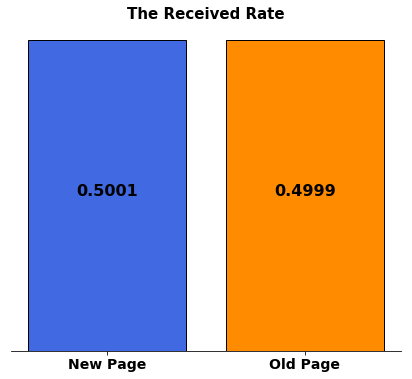

In [23]:
X = ['New Page', 'Old Page']
Y = [0.5001, 0.4999] # Conversion rates for both control and treatment after approximation


plt.figure(figsize=(7,6))
plt.bar(X, Y, edgecolor=["black", "black"] , color=['royalblue', 'darkorange'])

for i, g in enumerate(Y):
    plt.text(i, g - 0.25, "{}".format(g), fontsize=16, fontweight="bold", ha="center")

plt.title("The Received Rate", fontsize=15, fontweight="bold" )
plt.xticks(fontsize=14, fontweight="bold")
plt.yticks([])
sns.despine(left=True);

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Your answer goes here.**

&#9865;There is insufficient evidence that the conversion rate of individuals on the new page is higher than the conversion rate of the old page, showing the rate of individuals receiving the new page equal to 50.01% or nearly half, and thus almost equal to the percentage of the old page.

&#9865;It is also worth noting that the rate of conversion individuals in the control and treatment groups is almost equal, as the individuals of the control group were converted by approximately 12.04% and the treatment group individuals were less than them by a very simple rate of approximately 11.96%.

&#9865;In general, we can only be certain of this after further testing using inferential statistical methods.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  





>**Put your answer here.**

**The null and alternative hypotheses are:**

**1. The Null Hypotheses: P_new - P_old <= 0:**
$$H_0: P_{new} - P_{old} \leq 0 $$

**2. The Alternative Hypotheses: P_new - P_old > 0:**
$$H_1: P_{new} - P_{old} > 0 $$ 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [24]:
p_new = p
print('the convert rate for  P𝑛𝑒𝑤  under the null is: {}'.format(p_new))

the convert rate for  P𝑛𝑒𝑤  under the null is: 0.11959708724499628


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [25]:
p_old = p
print('the convert rate for  P𝑜𝑙𝑑  under the null is: {}'.format(p_old))

the convert rate for  P𝑜𝑙𝑑  under the null is: 0.11959708724499628


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [26]:
n_new = treatment_df.shape[0]
print('the 𝑛𝑛𝑒𝑤 is: {}'.format(n_new))

the 𝑛𝑛𝑒𝑤 is: 145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = control_df.shape[0]
print('the 𝑛𝑜𝑙𝑑 is: {}'.format(n_old))

the 𝑛𝑜𝑙𝑑 is: 145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [28]:
# Simulate a Sample for the treatment Group
sample_new_page = np.random.choice([1,0], size=n_new, p=[p_new, 1-p_new], replace= True)
sample_new_page

array([1, 0, 0, ..., 0, 0, 0])

In [29]:
sample_new_page.mean()

0.11968205904617714

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [30]:
# Simulate a Sample for the control Group
sample_old_page = np.random.choice([1,0], size=n_new, p=[p_old, 1-p_old], replace= True)
sample_old_page

array([0, 0, 0, ..., 0, 0, 1])

In [31]:
sample_old_page.mean()

0.12001926914871654

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [32]:
sample_new_page.mean() - sample_old_page.mean()

-0.00033721010253939809


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 



In [33]:
# Sampling distribution 
p_diffs = []

for i in range(10000):
    sample_new_page = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
    sample_old_page = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
    p_diffs.append(sample_new_page.mean() - sample_old_page.mean())

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>


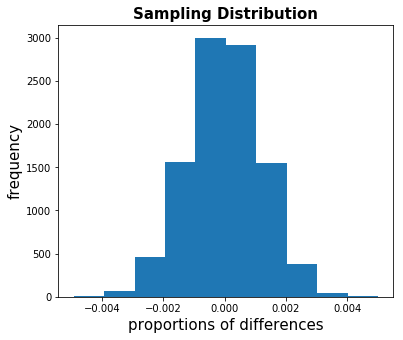

In [34]:
p_diffs = np.array(p_diffs) # convert to numpy array

#Look at the sampling distribution through the histogram
plt.figure(figsize=(6,5))
plt.hist(p_diffs)
plt.title('Sampling Distribution', fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15);

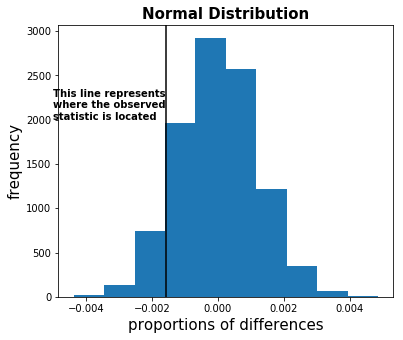

In [35]:
#Simulating a distribution under the null hypothesis through a normal distribution
null_vals= np.random.normal(0, p_diffs.std(), p_diffs.size)

text= "This line represents \nwhere the observed \nstatistic is located"

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_diff, c="black")
plt.text(-0.005, 2000, text, fontweight="bold")
plt.title('Normal Distribution',fontsize=15, fontweight="bold")
plt.xlabel('proportions of differences', fontsize=15)
plt.ylabel('frequency', fontsize=15);

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [36]:
print("The p-value is: {}".format((null_vals > obs_diff).mean()))

The p-value is: 0.906


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**Put your answer here.**

&#9865;"(null_vals > obs_diff).mean())" It is The normal distribution under null hypothesis of the proportion(p_diffs) representing the the variable(null_vals) most extreme from our statistics in favor of the alternative for the actual observed difference, which represents the variable (obs_diff). 

&#9865;The result of its value in scientific studies is called the (p-value) i.e. probability value.

&#9865;if p-value is less than or equal I error rate(alpha) = 0.05, we reject the null hypothesis.

&#9865;if p-value is greater than I error rate(alpha) = 0.05, we can't reject the null hypothesis.

&#9865;Since the (p-value) of ~0.91 is much larger than (alpha)=0.05, this indicates that the difference between the new page and the old page is very small, which means that the conversion rate of the new page is not higher than the old page.

&#9865;Therefore, we can't reject the null hypothesis!





**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [37]:
import statsmodels.api as sm;

# number of conversions with the old_page
convert_old = control_df.query('converted == 1').shape[0]

# number of conversions with the new_page
convert_new = treatment_df.query('converted == 1').shape[0]

# number of individuals who were shown the old_page
n_old = df2.query('landing_page=="old_page"').shape[0]

# number of individuals who received new_page
n_new = df2.query('landing_page=="new_page"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [38]:
convert_old , convert_new

(17489, 17264)

In [39]:
n_old , n_new

(145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.


In [40]:
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new], alternative='smaller')
print("Z-Score: {}".format(z_score),"\nP-Value: {}".format(p_value))

Z-Score: 1.3109241984234394 
P-Value: 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


>**Put your answer here.**

&#9865;The Z-Score: It is the standardization of the normal distribution under the null hypothesis to measure the number of errors in which the estimate falls.

&#9865;The P-Value: It is the same as the value of Z-Score after returning it to the normal distribution, whose value corresponds to the result of the p-value in the previous method, Which means that we cannot reject the null hypothesis.

&#9865;If we want to confirm also by using the hypothesis with the z-score law we do the following:

- Since we want to prove the alternative hypothesis that the p_new is larger than the p_old, we use these laws;

- It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. <br>

- For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>

- For a right-tailed test, not reject null if $Z_{score}$ < $Z_{\alpha}$. 

- Since the alpha(0.05) is the same as the Za(1.645) for the one-tailed tests. So, the value of Z-Score ~(1.311) is less than the value of Za(1.645), Which means that we can't reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Put your answer here.**

&#9865;**The Logistic Regression**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [41]:
# First, a quick look back at the dataframe (df2)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [42]:
type_dummies = pd.get_dummies(df2['group'])
df2 = df2.join(type_dummies)
df2.drop('control', axis= 1, inplace= True)
df2.rename(columns={'treatment': 'ab_page'}, inplace= True)

df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [43]:
df2['intercept'] = 1
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-04 19:40 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


>**Put your answer here.**

&#9865;In  regression the p-value are always given to test whether the parameter of the intercept or slope is equal to the value of zero for the probability of the null hypothesis, and vice versa with the alternative hypothesis that it is not equal to zero

&#9865;The p-value of the intercept is not as useful as the p-value of the slope represented by (ab_page), Where the p-value of (ab_page) which is 0.1899 indicates that it is higher than the value of alpha which is 0.05, therefore it is not statistically significant for the conversion rate.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Put your answer here.**

&#9865;It is a good idea to add features for other factors in order to reveal any hidden patterns around the data that may have a potential impact on the conversion rate, but if these factors are irrelevant, they may damage the model and become more complex.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [45]:
# Read the countries.csv
country_df = pd.read_csv('countries.csv')

country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
# Join with the df2 dataframe
country_df= country_df.set_index('user_id').join(df2.set_index('user_id'))

country_df.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [47]:
# Create the necessary dummy variables
type_dummies = pd.get_dummies(country_df['country'])
country_df = country_df.join(type_dummies)

country_df.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [48]:
log_mod = sm.Logit(country_df['converted'], country_df[['intercept', 'ab_page', 'UK', 'US' ]])
results = log_mod.fit()

results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-04 19:40 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

&#9865;The p-value for the US and UK countries are greater than 0.05, so we cannot reject the null hypothesis, since the two countries have no effect on the conversion rate.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [49]:
country_df['US_page'] = country_df['US'] * country_df['ab_page']
country_df['UK_page'] = country_df['UK'] * country_df['ab_page']

country_df.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,US_page,UK_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [50]:
# Fit your model, and summarize the results
log_mod = sm.Logit(country_df['converted'], country_df[['intercept', 'ab_page', 'UK', 'US', 'US_page', 'UK_page']])
results = log_mod.fit()

results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-04 19:40 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
US_page        0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_page        0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

>**Put your conclusion answer here.**

&#9865;The probability value of the page-state interaction for both the US and the UK is greater than 0.05, so we can't reject the null hypothesis.

&#9865;Based on all the above tests, we cannot reject the null hypothesis, as there is not enough evidence that the conversion rate of the new page is higher than the conversion rate of the old page

&#9865;But there are many factors to consider when designing an A/B test and drawing conclusions based on its results. here are some common ones to consider:

- Novelty effect and change aversion when existing users first experience a change.

- Sufficient traffic and conversions to have significant and repeatable results.

- The best metric choice for making the ultimate decision (eg. measuring revenue vs. clicks).

- Long enough run time for the experiment to account for changes in behavior based on time of day/week or seasonal events.

- The practical significance of a conversion rate (the cost of launching a new feature vs. the gain from the increase in conversion).






<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!